## Diabetes Prediction 

In [1]:
# Let's start with importing the necessary libraries
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read the data file
data=pd.read_csv("/config/workspace/dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the dataset.

From the data.describe(), we can see there are few data for columns Glucose, Insulin,Skin thickness, BMI and Blood Pressure as 0 value, which is not possible.So, we can either remove these datapoints (not a feasible choice because we losse data) or replace them with some value(mean/median/mode).

In [5]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

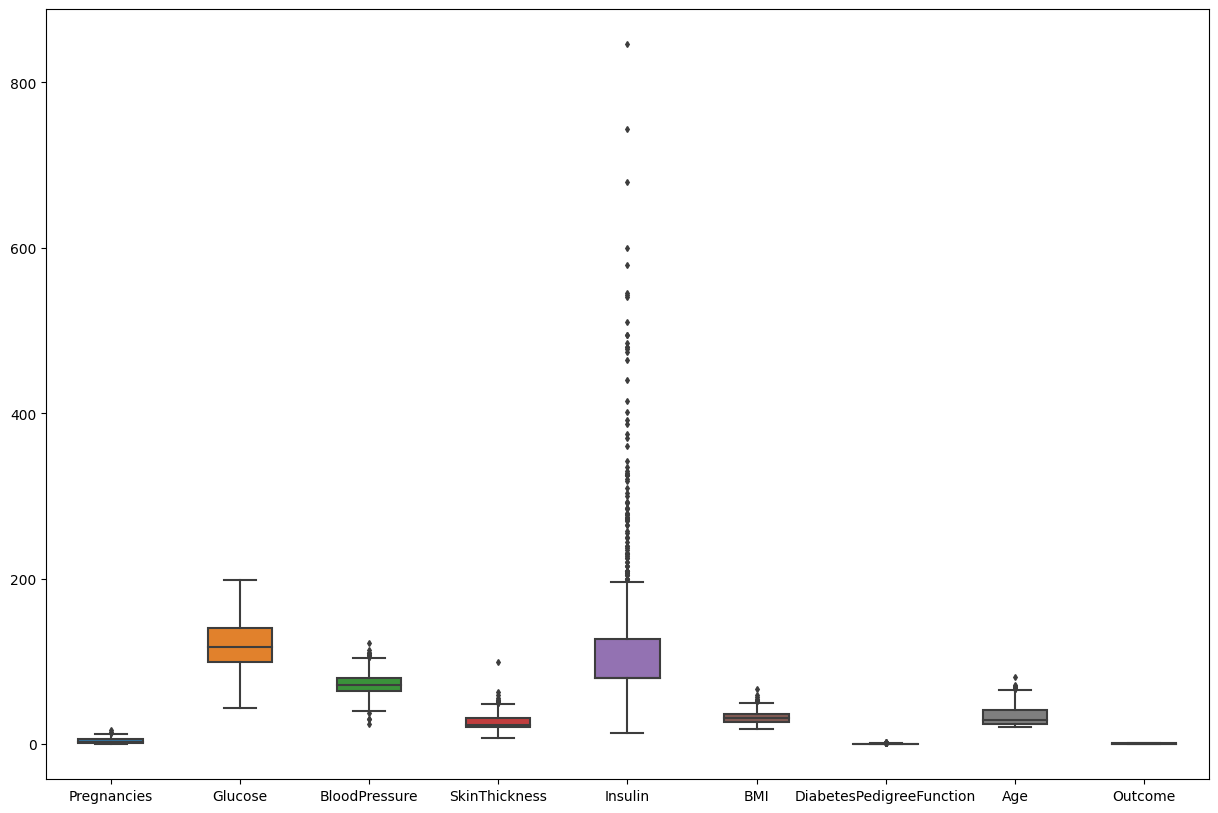

In [7]:
# Now let us deal with the outliers in the dataset by using the boxplot
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [8]:
scaler=StandardScaler()

In [9]:
scaled_data=scaler.fit_transform(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

<Axes: >

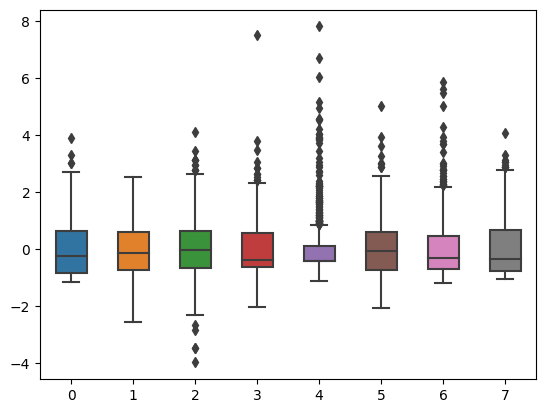

In [10]:
sns.boxplot(data=scaled_data,width=0.5)

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Now, we can clearly see that there are many outliers present in the features of the dataset.
We can handle these outliers by IQR Technique..

In [12]:
Q1=np.percentile(data['Insulin'],0.25)
print(Q1)

15.9175


In [13]:
minimum,Q1,Q2,Q3,maximum=np.quantile(data['Insulin'],[0,0.25,0.50,0.75,1])

In [14]:
IQR=Q3-Q1
print(IQR)

47.45052083333333


In [15]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [16]:
lower_fence,higher_fence

(8.623697916666671, 198.42578125)

In [17]:
data['Insulin']

0       79.799479
1       79.799479
2       79.799479
3       94.000000
4      168.000000
          ...    
763    180.000000
764     79.799479
765    112.000000
766     79.799479
767     79.799479
Name: Insulin, Length: 768, dtype: float64

In [18]:
outliers=[]
for i in data['Insulin']:
    if i<= 8.623 or i>=198.42:
        outliers.append(i) 

In [19]:
outliers

[543.0,
 846.0,
 230.0,
 235.0,
 245.0,
 207.0,
 240.0,
 300.0,
 342.0,
 304.0,
 270.0,
 228.0,
 220.0,
 495.0,
 225.0,
 325.0,
 284.0,
 204.0,
 485.0,
 285.0,
 495.0,
 210.0,
 318.0,
 280.0,
 271.0,
 478.0,
 744.0,
 370.0,
 680.0,
 402.0,
 258.0,
 375.0,
 278.0,
 545.0,
 220.0,
 360.0,
 215.0,
 205.0,
 231.0,
 255.0,
 249.0,
 325.0,
 293.0,
 465.0,
 325.0,
 285.0,
 415.0,
 275.0,
 579.0,
 310.0,
 474.0,
 210.0,
 277.0,
 210.0,
 237.0,
 328.0,
 250.0,
 480.0,
 265.0,
 210.0,
 326.0,
 210.0,
 215.0,
 225.0,
 207.0,
 215.0,
 274.0,
 330.0,
 600.0,
 230.0,
 293.0,
 272.0,
 321.0,
 440.0,
 540.0,
 200.0,
 231.0,
 240.0,
 265.0,
 205.0,
 480.0,
 200.0,
 335.0,
 387.0,
 291.0,
 392.0,
 200.0,
 200.0,
 510.0]

In [20]:
len(outliers)

89

In [21]:
data_copy=data.copy()

In [22]:
data_copy['Insulin']

0       79.799479
1       79.799479
2       79.799479
3       94.000000
4      168.000000
          ...    
763    180.000000
764     79.799479
765    112.000000
766     79.799479
767     79.799479
Name: Insulin, Length: 768, dtype: float64

In [23]:
integer=[]
for i in range(len(data_copy['Insulin'])):
    integer.append(int(data_copy['Insulin'][i]))


In [24]:
integer

[79,
 79,
 79,
 94,
 168,
 79,
 88,
 79,
 543,
 79,
 79,
 79,
 79,
 846,
 175,
 79,
 230,
 79,
 83,
 96,
 235,
 79,
 79,
 79,
 146,
 115,
 79,
 140,
 110,
 79,
 79,
 245,
 54,
 79,
 79,
 192,
 79,
 79,
 79,
 207,
 70,
 79,
 79,
 240,
 79,
 79,
 79,
 79,
 79,
 79,
 82,
 36,
 23,
 300,
 342,
 79,
 304,
 110,
 79,
 142,
 79,
 79,
 79,
 128,
 79,
 79,
 79,
 79,
 38,
 100,
 90,
 140,
 79,
 270,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 71,
 79,
 79,
 125,
 79,
 71,
 110,
 79,
 79,
 176,
 48,
 79,
 64,
 228,
 79,
 76,
 64,
 220,
 79,
 79,
 79,
 40,
 79,
 152,
 79,
 140,
 18,
 36,
 135,
 495,
 37,
 79,
 175,
 79,
 79,
 79,
 79,
 51,
 100,
 79,
 100,
 79,
 79,
 99,
 135,
 94,
 145,
 79,
 168,
 79,
 225,
 79,
 49,
 140,
 50,
 92,
 79,
 325,
 79,
 79,
 63,
 79,
 284,
 79,
 79,
 119,
 79,
 79,
 204,
 79,
 155,
 485,
 79,
 79,
 94,
 135,
 53,
 114,
 79,
 105,
 285,
 79,
 79,
 156,
 79,
 79,
 79,
 78,
 79,
 130,
 79,
 48,
 55,
 130,
 79,
 130,
 79,
 79,
 79,
 92,
 23,
 79,
 79,
 79,
 495,
 58,
 114,

In [25]:
a=6.32

In [26]:
len(integer)

768

In [27]:
values=[]
for i in range(len(integer)):
    for j in range(len(outliers)):
        if integer[i]==outliers[j]:
            values.append(integer[i])

   

In [28]:
values

[543,
 846,
 230,
 230,
 235,
 245,
 207,
 207,
 240,
 240,
 300,
 342,
 304,
 270,
 228,
 220,
 220,
 495,
 495,
 225,
 225,
 325,
 325,
 325,
 284,
 204,
 485,
 285,
 285,
 495,
 495,
 210,
 210,
 210,
 210,
 210,
 318,
 280,
 271,
 478,
 744,
 370,
 680,
 402,
 258,
 375,
 278,
 545,
 220,
 220,
 360,
 215,
 215,
 215,
 205,
 205,
 231,
 231,
 255,
 249,
 325,
 325,
 325,
 293,
 293,
 465,
 325,
 325,
 325,
 285,
 285,
 415,
 275,
 579,
 310,
 474,
 210,
 210,
 210,
 210,
 210,
 277,
 210,
 210,
 210,
 210,
 210,
 237,
 328,
 250,
 480,
 480,
 265,
 265,
 210,
 210,
 210,
 210,
 210,
 326,
 210,
 210,
 210,
 210,
 210,
 215,
 215,
 215,
 225,
 225,
 207,
 207,
 215,
 215,
 215,
 274,
 330,
 600,
 230,
 230,
 293,
 293,
 272,
 321,
 440,
 540,
 200,
 200,
 200,
 200,
 231,
 231,
 240,
 240,
 265,
 265,
 205,
 205,
 480,
 480,
 200,
 200,
 200,
 200,
 335,
 387,
 291,
 392,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 510]

In [29]:
len(values)

157

In [30]:
len(integer)

768

In [31]:
len(values)

157

In [32]:
for i in values:
    try:
        integer.remove(i)
    except ValueError:
        pass


In [33]:
integer

[79,
 79,
 79,
 94,
 168,
 79,
 88,
 79,
 79,
 79,
 79,
 79,
 175,
 79,
 79,
 83,
 96,
 79,
 79,
 79,
 146,
 115,
 79,
 140,
 110,
 79,
 79,
 54,
 79,
 79,
 192,
 79,
 79,
 79,
 70,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 82,
 36,
 23,
 79,
 110,
 79,
 142,
 79,
 79,
 79,
 128,
 79,
 79,
 79,
 79,
 38,
 100,
 90,
 140,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 71,
 79,
 79,
 125,
 79,
 71,
 110,
 79,
 79,
 176,
 48,
 79,
 64,
 79,
 76,
 64,
 79,
 79,
 79,
 40,
 79,
 152,
 79,
 140,
 18,
 36,
 135,
 37,
 79,
 175,
 79,
 79,
 79,
 79,
 51,
 100,
 79,
 100,
 79,
 79,
 99,
 135,
 94,
 145,
 79,
 168,
 79,
 79,
 49,
 140,
 50,
 92,
 79,
 79,
 79,
 63,
 79,
 79,
 79,
 119,
 79,
 79,
 79,
 155,
 79,
 79,
 94,
 135,
 53,
 114,
 79,
 105,
 79,
 79,
 156,
 79,
 79,
 79,
 78,
 79,
 130,
 79,
 48,
 55,
 130,
 79,
 130,
 79,
 79,
 79,
 92,
 23,
 79,
 79,
 79,
 58,
 114,
 160,
 79,
 94,
 79,
 79,
 79,
 79,
 48,
 99,
 79,
 79,
 79,
 44,
 190,
 79,
 79,
 87,
 79,
 79,
 79,
 79,
 130,
 175,
 129,


In [34]:
len(integer)

679

In [35]:
679+89

768

In [36]:
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [37]:
scaled_data

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [40]:
df=pd.DataFrame(scaled_data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [48]:
df2=df.copy()

In [49]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


In [50]:
df2=df2.drop('Insulin', axis=1)

In [51]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,1.549899,5.484909,-0.020496


In [68]:
data=data.drop('Insulin',axis=1)

In [69]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,30.1,0.349,47,1


In [73]:
integer=pd.DataFrame(integer)

In [74]:
integer

,0
0,79
1,79
2,79
3,94
4,168
...,...
674,180
675,79
676,112
677,79


In [76]:
dataset=pd.concat([data,integer],axis=1)

In [78]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,0
0,6,148.0,72.0,35.000000,33.6,0.627,50,1,79.0
1,1,85.0,66.0,29.000000,26.6,0.351,31,0,79.0
2,8,183.0,64.0,20.536458,23.3,0.672,32,1,79.0
3,1,89.0,66.0,23.000000,28.1,0.167,21,0,94.0
4,0,137.0,40.0,35.000000,43.1,2.288,33,1,168.0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,32.9,0.171,63,0,NaN
764,2,122.0,70.0,27.000000,36.8,0.340,27,0,NaN
765,5,121.0,72.0,23.000000,26.2,0.245,30,0,NaN
766,1,126.0,60.0,20.536458,30.1,0.349,47,1,NaN


In [80]:
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [82]:
## Segregate the dependent and independent features
X=data_copy.drop(columns=['Outcome'])
y=data['Outcome']

In [83]:
## Segregate the dataset into train and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [84]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [86]:
import pickle 
## Standard Scaling-Standardization
# scaling the data
def scaler_standard(X_train,X_test):
    # scaling the data
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    #saving the model
    file=open('/config/workspace/Model/standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [88]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [89]:
X_train_scaled

array([[-0.52639686, -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

In [90]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [92]:
## Hyperparameter Tuning
## GridSearch CV

from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# parameter grid
parameters={
    'penalty':['l1','l2'],
    'C':np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear']
}

In [95]:
log_reg=LogisticRegression()
clf=GridSearchCV(log_reg # Model
,param_grid=parameters # hyperparameters
,scoring='accuracy' # metric of scoring
,cv=10)     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [96]:
clf.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [97]:
clf.best_score_

0.7686673717609731

In [98]:
## Let's predict the data now...
y_pred=clf.predict(X_test_scaled)

In [100]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7662337662337663

In [101]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[83, 16],
       [20, 35]])

In [102]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=[1][0]
true_negative=conf_mat[1][1]

In [103]:
Accuracy=(true_positive+true_negative)/(true_positive+false_negative+true_negative+false_positive)
Accuracy

0.8740740740740741

In [104]:
Precision=true_positive/(true_positive+false_positive)
Precision

0.8383838383838383

In [105]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.9880952380952381

In [106]:
F1_score=2*(Recall*Precision)/(Recall+Precision)
F1_score

0.907103825136612

In [108]:
import pickle
file=open('/config/workspace/Model/modelforPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()